### [Understanding Leverage Effect using Python ]('https://mlforanalytics.com/2020/05/01/financial-analytics-leverage-effect-using-python/')
What is Leverage effect?
Leverage effect refers to negative correlation between asset’s returns and the changes in its volatility.   
Thus, whenever we see rise in returns, there will be decrease in volatility. Let’s see it by MSFT example.  
 We will be using log returns in this case.

Find out rolling standard deviation for different windows.

In [14]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [15]:
# Downloading MSFT data from yfinance from 1st January 2010 to 31st March 2020
msftStockData = yf.download( 'MSFT',
                        start = '2010-01-01',
                        end = '2024-03-31',
                        progress = False)

In [16]:
# Checking what's in there the dataframe by loading first 5 rows
msftStockData.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.1,30.590000,30.950001,23.431585,38409100
2010-01-05,30.850000,31.1,30.639999,30.959999,23.439163,49749600


In [17]:
# Calculating log returns and obtaining column to contain it
msftStockData['Log Returns'] = np.log(msftStockData['Adj Close']/msftStockData['Adj Close'].shift(1)) 
msftStockData.head(3)

,Open,High,Low,Close,Adj Close,Volume,Log Returns
Date,,,,,,,
2010-01-04,30.620001,31.10,30.590000,30.950001,23.431585,38409100,NaN
2010-01-05,30.850000,31.10,30.639999,30.959999,23.439163,49749600,0.000323
2010-01-06,30.879999,31.08,30.520000,30.770000,23.295313,58182400,-0.006156


In [18]:
# Using back fill method to replace NaN values
msftStockData['Log Returns'] = msftStockData['Log Returns'].fillna(method = 'bfill')
msftStockData.head(3)

/tmp/ipykernel_7805/603808288.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  msftStockData['Log Returns'] = msftStockData['Log Returns'].fillna(method = 'bfill')


,Open,High,Low,Close,Adj Close,Volume,Log Returns
Date,,,,,,,
2010-01-04,30.620001,31.10,30.590000,30.950001,23.431585,38409100,0.000323
2010-01-05,30.850000,31.10,30.639999,30.959999,23.439163,49749600,0.000323
2010-01-06,30.879999,31.08,30.520000,30.770000,23.295313,58182400,-0.006156


In [19]:
# Taking monthly window - average of 21 days per month is taken in the trading world, 
# This is the time span for which particular stock exchange is open
# We have on average 21 trading days in a month
msftStockData['21_day_mstd'] = msftStockData[['Log Returns']].rolling(window=21).std()
msftStockData.head(3)


,Open,High,Low,Close,Adj Close,Volume,Log Returns,21_day_mstd
Date,,,,,,,,
2010-01-04,30.620001,31.10,30.590000,30.950001,23.431585,38409100,0.000323,NaN
2010-01-05,30.850000,31.10,30.639999,30.959999,23.439163,49749600,0.000323,NaN
2010-01-06,30.879999,31.08,30.520000,30.770000,23.295313,58182400,-0.006156,NaN


In [20]:
# Taking yearly window - average of 252 days per year is taken in the trading world, 
# This is the time span for which particular stock exchange is open
# We have on average 252 trading days in an year
msftStockData['252_day_mstd'] = msftStockData[['Log Returns']].rolling(window=252).std()
msftStockData.head(3)

,Open,High,Low,Close,Adj Close,Volume,Log Returns,21_day_mstd,252_day_mstd
Date,,,,,,,,,
2010-01-04,30.620001,31.10,30.590000,30.950001,23.431585,38409100,0.000323,NaN,NaN
2010-01-05,30.850000,31.10,30.639999,30.959999,23.439163,49749600,0.000323,NaN,NaN
2010-01-06,30.879999,31.08,30.520000,30.770000,23.295313,58182400,-0.006156,NaN,NaN


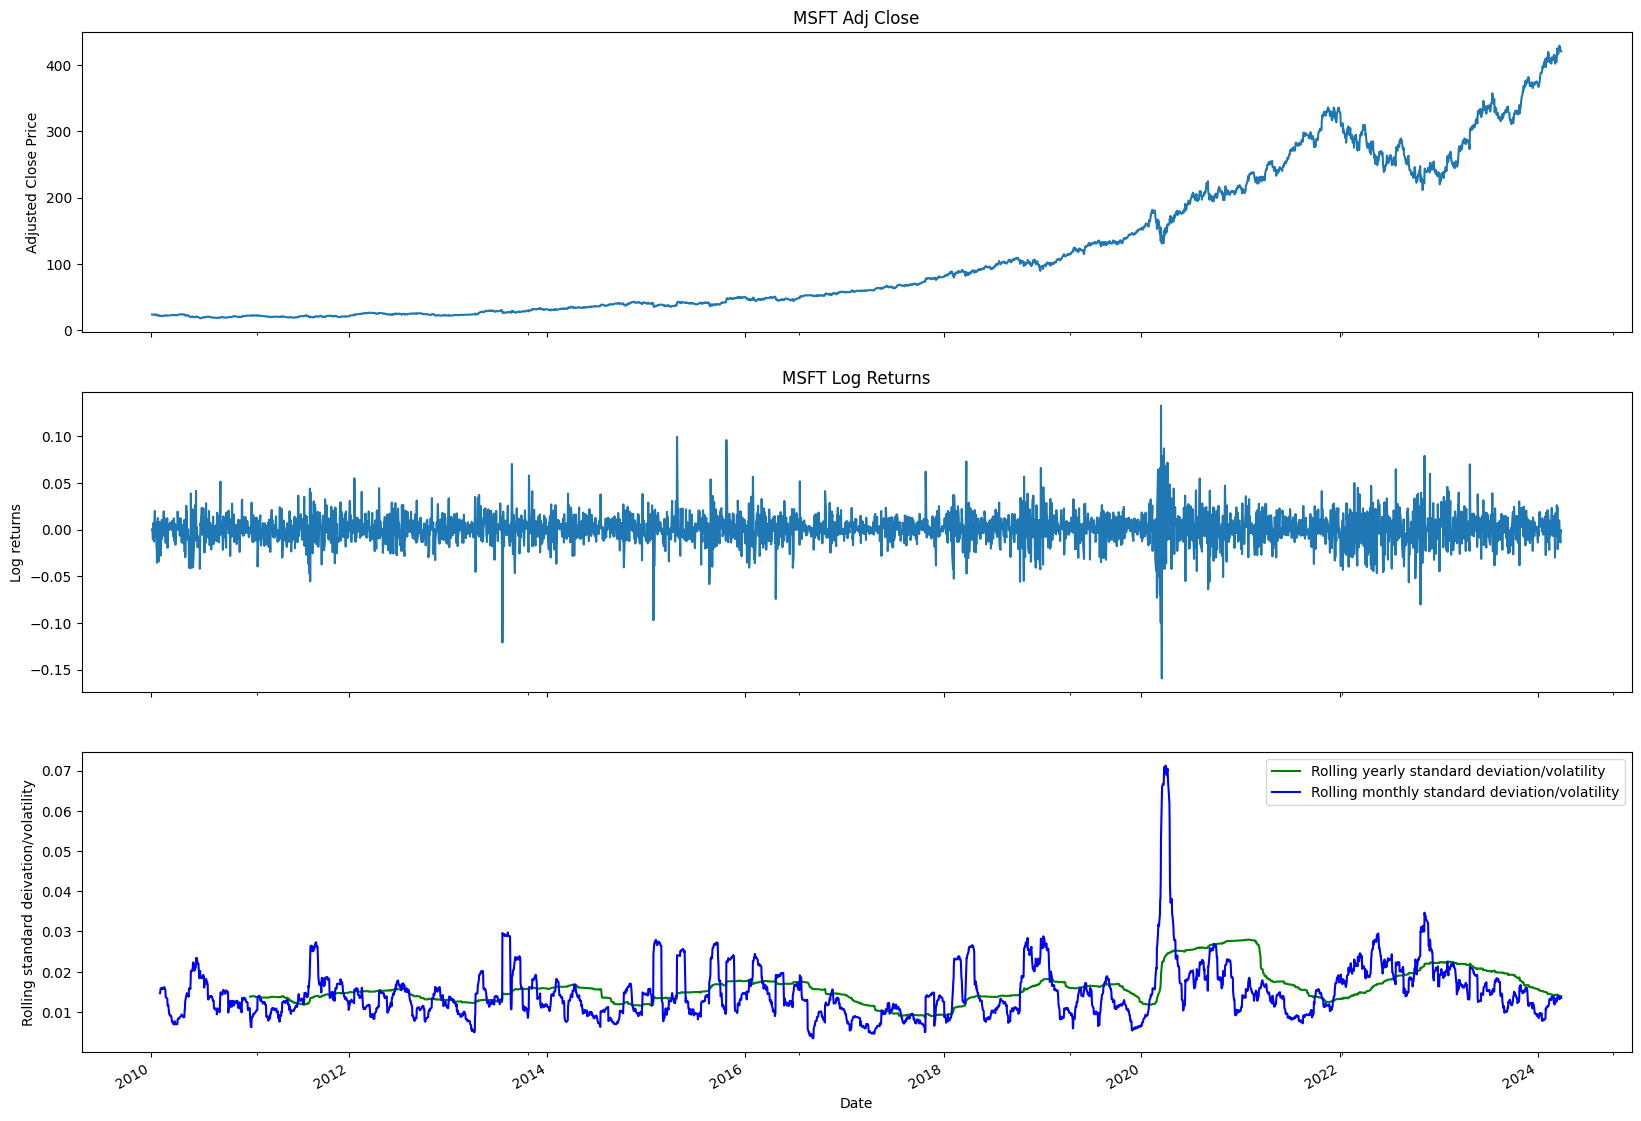

In [21]:
# Plotting MSFT Adj Close, daily log returns, 21_day_mstd and 252_day_mstd 
# Distributing in 3 subplots
# sharex controls sharing of properties among x-axis.
# That is, all three subplots will use same x-axis
fig, ax = plt.subplots(3, 1, figsize=(20, 15), sharex=True) 

# Subplot 1 - Daily Adj Close trend
msftStockData['Adj Close'].plot(ax=ax[0])
# Setting title and ylabel
ax[0].set(title='MSFT Adj Close', ylabel='Adjusted Close Price')

# Subplot 2 - Daily log returns
msftStockData['Log Returns'].plot(ax=ax[1])
# Setting title and ylabel
ax[1].set(title='MSFT Log Returns', ylabel='Log returns')

# Subplot 3 - 21 days and 252 days windows to calculate rolling standard deviations
msftStockData['252_day_mstd'].plot(ax=ax[2], color='g', label='Rolling yearly standard deviation/volatility')
msftStockData['21_day_mstd'].plot(ax=ax[2], color='b', label='Rolling monthly standard deviation/volatility')
ax[2].set(ylabel='Rolling standard deivation/volatility', xlabel='Date')
ax[2].legend()

From the upper graph, see that when log returns decrease, the volatility shoots up. 